<a href="https://colab.research.google.com/github/StevenBlaine/MLA_SRB/blob/main/MLA2_SRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 2**
**Steven Blaine
<br>CS430-ON
<br>Machine Learning in the Cloud**

## **1. Imports**

Standard Imports for Each Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Specific to Performing Linear Regression using SKLearn

In [2]:
from sklearn.linear_model import LinearRegression

Specific to Performing Logistic Regression using SKLearn

In [3]:
from sklearn.linear_model import LogisticRegression

Specific to Transformers, the Pipeline, and Data Splitting 

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Various Performance Measures for Model Evaluation

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve

### **Confusion Matrix Code**

In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### **ROC Curve Code**

In [6]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## **2. Acquire Data - Linear Regression**

### **Connect to Google Drive**

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Read CSV File**

In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

## **3. Statistics and Visual Exploration - Linear Regression**

### **Rename Columns - Linear Regression**

In [11]:
list(df.columns.values)

['date',
 'Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'WeekStatus',
 'Day_of_week',
 'Load_Type']

In [12]:
dict = {'Usage_kWh': 'usage_kwh', 'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh', 'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
        'Lagging_Current_Power_Factor': 'lag_current_pwr', 'Leading_Current_Power_Factor': 'lead_current_pwr', 'NSM': 'nsm', 'WeekStatus': 'week_status',
        'Day_of_week': 'day_of_week', 'Load_Type': 'load_type'}

In [13]:
df.rename(columns=dict,
          inplace=True)

### **Summarize Columns and Count Load Types - Linear Regression**

Summarize Numerical Columns of Data

In [14]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [15]:
df.corr()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
usage_kwh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
lag_react_pwr_kvarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
lead_react_pwr_kvarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
lag_current_pwr,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
lead_current_pwr,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
nsm,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


### **Create Barplot - Linear Regression**

Counts of Different Load Types

In [16]:
df.dtypes

date                     object
usage_kwh               float64
lag_react_pwr_kvarh     float64
lead_react_pwr_kvarh    float64
CO2(tCO2)               float64
lag_current_pwr         float64
lead_current_pwr        float64
nsm                       int64
week_status              object
day_of_week              object
load_type                object
dtype: object

In [17]:
df.load_type.value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: load_type, dtype: int64

In [18]:
df2 = df.load_type.value_counts()

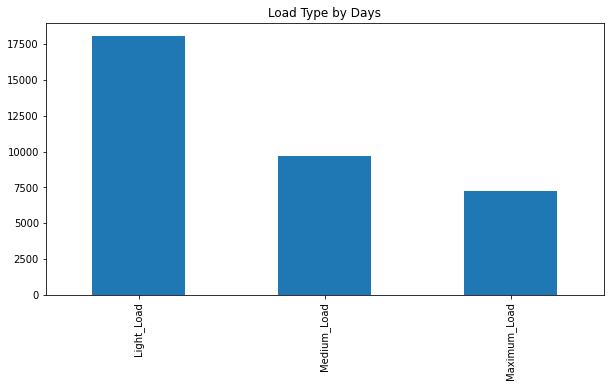

In [19]:
df2.plot(kind = 'bar', x = 'Load Type', title = 'Load Type by Days', figsize=(10,5))

### **Create Pairplot - Linear Regression**

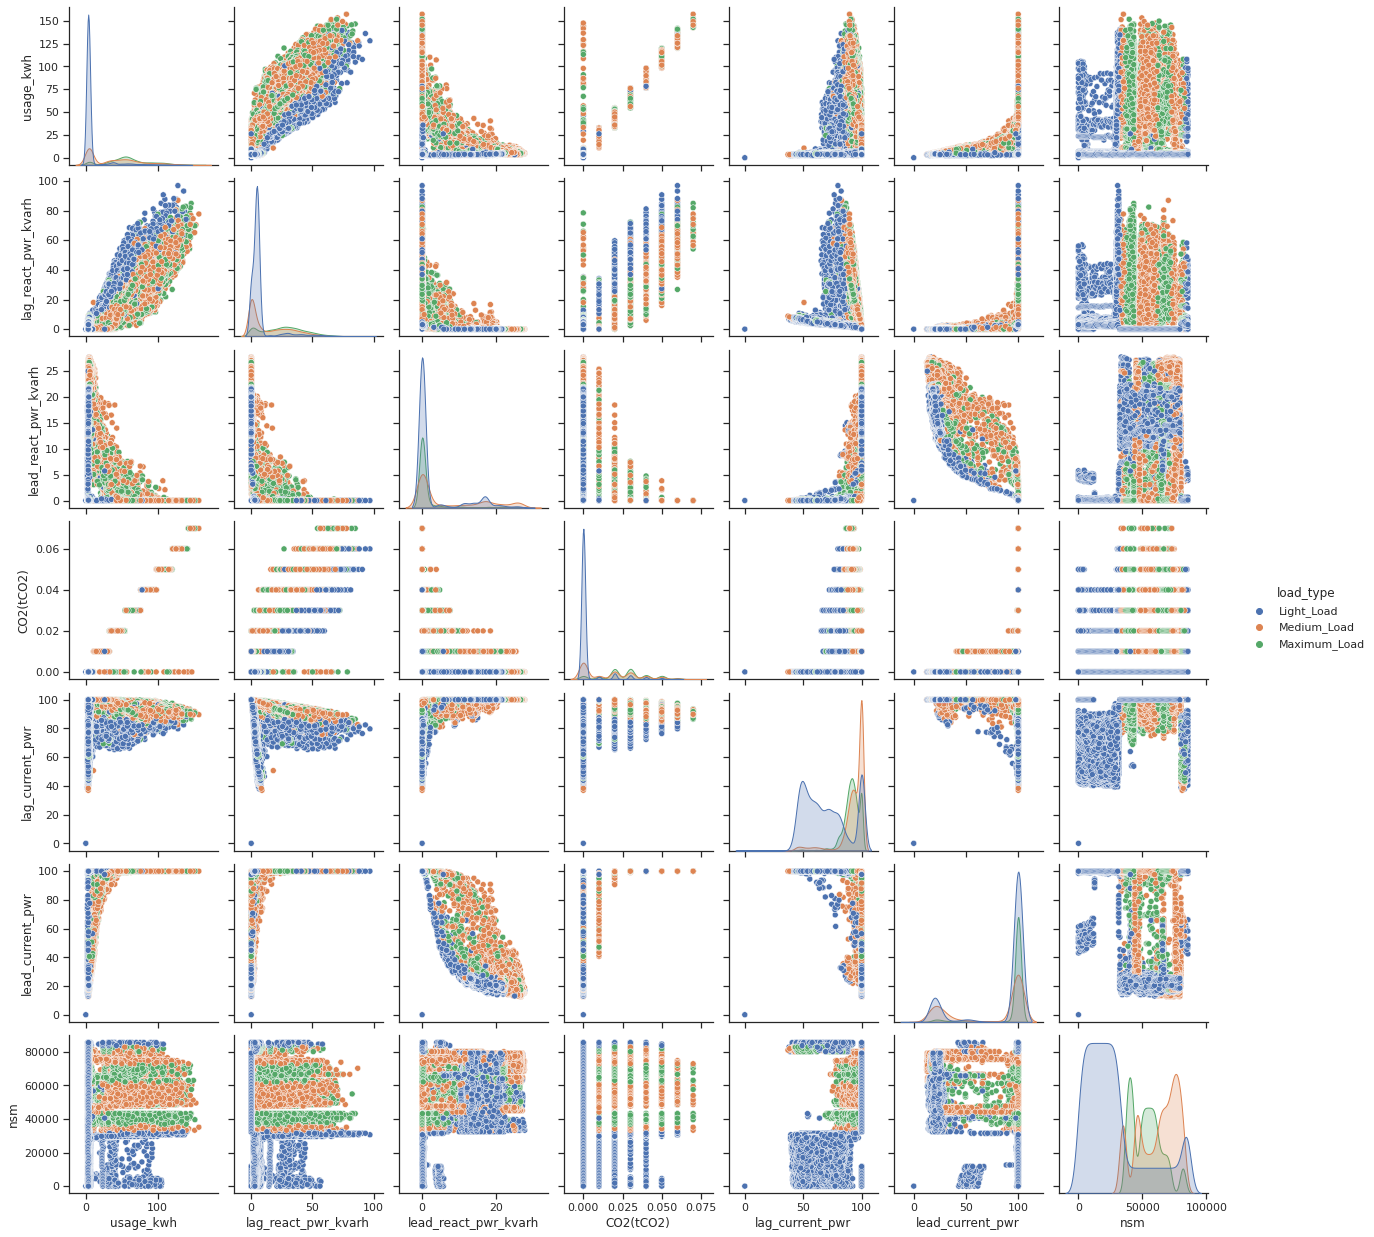

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue='load_type')
plt.show()

### **Comments on Patterns of Interest in Pairplot - Linear Regression**

Among other things, based on an ocular test (visual inspection) of the pairplot above, notable are a couple of fairly linear relationships: an increasing one between lag_react_pwr_kvarh (lagging current reactive power) and usage_kwh, as well as a decreasing one between lead_react_power_kvarh (leading current reactive power) and lead_current_pwr (leading current power).

## **4. Splitting Data into Train/Test - Linear Regression**

### **Create X DataFrame - Linear Regression**

In [20]:
df.columns

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')

In [21]:
df.drop(['date'], axis=1, inplace=False)

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [22]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type']]

### **Create y DataFrame - Linear Regression**

In [23]:
y = df['usage_kwh']

### **Split Data into Train/Test - Linear Regression**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

## **5. Building the Pipeline - Linear Regression**

### **Create Column Transformer - Linear Regression**

In [25]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )

### **Create Pipeline - Linear Regression**

In [26]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr_model', LinearRegression()),
])

Import to Display Pipeline

In [27]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

## **6. Executing the Model - Linear Regression**

### **Run Pipeline - Linear Regression**

In [37]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

## **7. Evaluating the Model - Linear Regression**

### **Predict Values - Linear Regression**

In [46]:
y_pred = pipeline.predict(X_test)

### **Calculate Performance Measures - Linear Regression**

Root Mean Squared Error ("RSME") for Both Train and Test

In [42]:
y_pred = pipeline.predict(X_train)
print(mean_squared_error(y_train, y_pred)**(0.5))

4.785588662997222


In [47]:
print(mean_squared_error(y_test, y_pred)**(0.5))

4.223460245256403


RSME Interpretational Note: as an experiment (in contrast to usual practice), it is necessary to run the model on the training set in order to obtain the value for that set.  Interestingly, the values here differ somewhat, raising some concern about model consistency.

R-Squared Value of Model (Test Only)

In [48]:
r2_score(y_pred, y_test)

0.984068463185959

R-Squared Interpretational Note: this is a very high score/value, which is desired for this performance measure.

Model Intercept Value (Bias) and Coefficients

In [ ]:
pipeline.named_steps['mlr_model'].intercept_
pipeline.named_steps['mlr_model'].coef_

array([ 9.41029844e+12,  6.78395115e+12,  1.03102385e+13,  1.03102385e+13,
        1.29365857e+13,  1.29365857e+13,  1.03102385e+13,  1.03102385e+13,
        1.03102385e+13,  6.52580108e+13,  6.52580108e+13,  6.52580108e+13,
        3.17280517e+01,  1.97788798e+00,  1.15043685e+02,  1.21901106e+01,
        6.06248667e+00, -2.54652023e-01])

## **8. Conclusion - Linear Regression**

Linear regression, in general, is known for its reasonable accuracy, and, applying our performance measures, that seems to be the case here.  This multiple linear regression model capably predicting kwh usage, by providing at least a baseline of the relationship between the features and the output.

## **1. Acquire Data - Logistic Regression** 

### **Recode week_status Data - Logistic Regression**

In [ ]:
df['week_status'] = df['week_status'].map({'Weekday': 1, 'Weekend': 0})
df.sample(20)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
3210,03/02/2018 10:45,40.86,0.97,1.12,0.02,99.97,99.96,38700,0,Saturday,Maximum_Load
6812,12/03/2018 23:15,4.50,6.34,0.00,0.00,57.88,100.00,83700,1,Monday,Light_Load
14196,28/05/2018 21:15,6.48,0.00,20.38,0.00,100.00,30.30,76500,1,Monday,Medium_Load
10237,17/04/2018 15:30,87.23,30.24,0.00,0.04,94.48,100.00,55800,1,Tuesday,Maximum_Load
4901,21/02/2018 01:30,6.19,5.44,0.00,0.00,75.11,100.00,5400,1,Wednesday,Light_Load
23836,06/09/2018 07:15,3.06,5.87,0.00,0.00,46.23,100.00,26100,1,Thursday,Light_Load
31307,23/11/2018 03:00,3.02,1.94,0.32,0.00,84.14,99.44,10800,1,Friday,Light_Load
11561,01/05/2018 10:30,3.13,0.00,16.92,0.00,100.00,18.19,37800,1,Tuesday,Light_Load
10903,24/04/2018 14:00,55.51,28.04,0.00,0.03,89.26,100.00,50400,1,Tuesday,Maximum_Load
32879,09/12/2018 12:00,3.89,0.00,18.04,0.00,100.00,21.08,43200,0,Sunday,Light_Load


##**2. Splitting Data into Train/Test - Logistic Regression**

### **Create X DataFrame - Logistic Regression**

In [ ]:
df.columns

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')

In [ ]:
X = df[['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'load_type']]

### **Create y DataFrame - Logistic Regression**

In [ ]:
y = df[['week_status']]

### **Split Data into Test/Train - Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)

## **3. Building the Pipeline - Logistic Regression**

### **Create Column Transformer - Logistic Regression**

In [ ]:
num_attribs = ['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['load_type']
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )

### **Create Pipeline - Logistic Regression**

In [ ]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                     ])

## **4. Executing the Model - Logistic Regression**

### **Run Pipeline - Logistic Regression**

In [ ]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

##**5. Evaluating the Model - Logistic Regression**

### **Predict Values - Logistic Regression**

In [ ]:
y_pred = pipeline.predict(X_test)

### **Calculate Performance Measures - Logistic Regression**

Generate Confusion Matrix

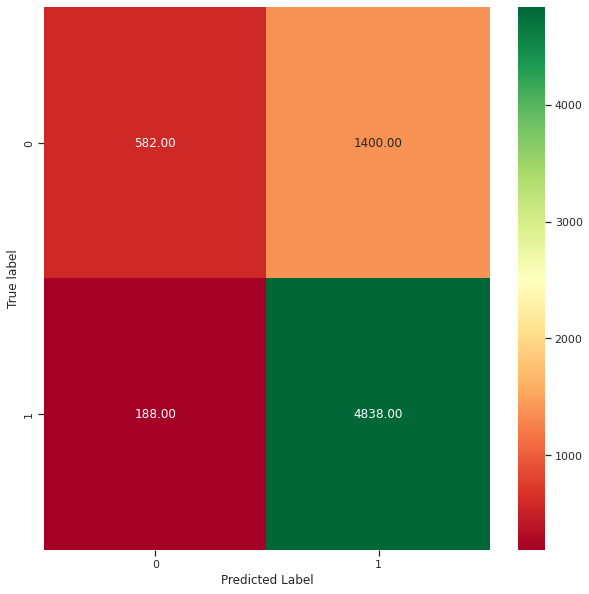

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
plot_cm(y_test,y_pred)

Calculate Precision, Recall, and F1 Scores

In [ ]:
precision_score(y_test,y_pred)

0.7755690926579032

In [ ]:
recall_score(y_test,y_pred)

0.9625945085555113

In [ ]:
f1_score(y_test,y_pred)

0.8590198863636364

Interpretational Notes: precision is a good measure to determine, when the costs of false positive is high, while recall is a preferred metric where there is a high cost associated with false negatives.  

Generate Precision-Recall Curve

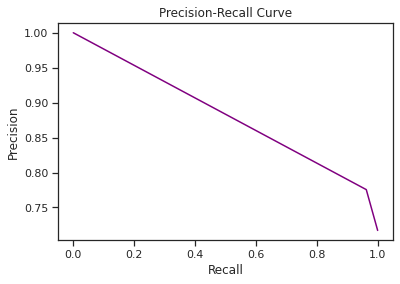

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

Curve Choice Explanation and Interpretational Notes: in contrast to the ROC Curve, the Precision-Recall Curve's focus on the minority class makes it an effective diagnostic for imbalanced binary classification, and, in the present case, there is a moderate imbalance between the number of weekdays and weekend days in each week. 

The x-axis shows the recall and the y-axis shows the precision for various thresholds.  As recall increases, precision decreases -- here, quite linearly.

## **6. Conclusion - Logistic Regression**

As to how suitable the logistic regression model is for predicting week_status (i.e., whether data represents a weekday or a weekend day), not surprisingly, the logistic regression performs well where binary-type classification is the task at hand.